# 🔥 MLE & MAP Estimation for a Coin Toss

## 1️⃣ Problem Setup
Suppose we flip a coin \(n\) times. We define:
- \( y_i = 1 \) (Heads) and \( y_i = 0 \) (Tails).
- \( p \) is the unknown probability of getting heads.

Each coin flip follows a **Bernoulli distribution**:

\[
P(y_i | p) = p^{y_i} (1 - p)^{1 - y_i}
\]

For **MLE** and **MAP**, we estimate \( p \) given observed data.

---

## 2️⃣ Maximum Likelihood Estimation (MLE)
### **Likelihood Function:**
Since coin flips are **independent**, the likelihood function is:

\[
L(p|y) = \prod_{i=1}^{n} p^{y_i} (1 - p)^{1 - y_i}
\]

Taking the **log-likelihood**:

\[
\ell(p) = \sum_{i=1}^{n} \left[ y_i \log(p) + (1 - y_i) \log(1 - p) \right]
\]

### **Finding MLE:**
To maximize, take derivative w.r.t. \( p \):

\[
\frac{d\ell}{dp} = \frac{\sum y_i}{p} - \frac{n - \sum y_i}{1 - p} = 0
\]

Solving for \( p \):

\[
\hat{p}_{MLE} = \frac{\sum y_i}{n}
\]

This is simply the **fraction of heads observed**.

---

## 3️⃣ Maximum A Posteriori Estimation (MAP)
We introduce a **prior belief** using a **Beta distribution**:

\[
p(p|\alpha, \beta) \propto p^{\alpha - 1} (1 - p)^{\beta - 1}
\]

Using **Bayes' Theorem**:

\[
p(p | y, \alpha, \beta) \propto p^{\sum y_i + \alpha - 1} (1 - p)^{n - \sum y_i + \beta - 1}
\]

Taking the **mode** (MAP estimate):

\[
\hat{p}_{MAP} = \frac{\sum y_i + \alpha - 1}{n + \alpha + \beta - 2}
\]

### **Interpretation:**
- If **\(\alpha = 1, \beta = 1\)** (Uniform prior), then **MAP = MLE**.
- If \(\alpha > 1\), \(\beta > 1\), MAP **smooths the estimate**.

---


MLE Estimate: 0.680
MAP Estimate: 0.673


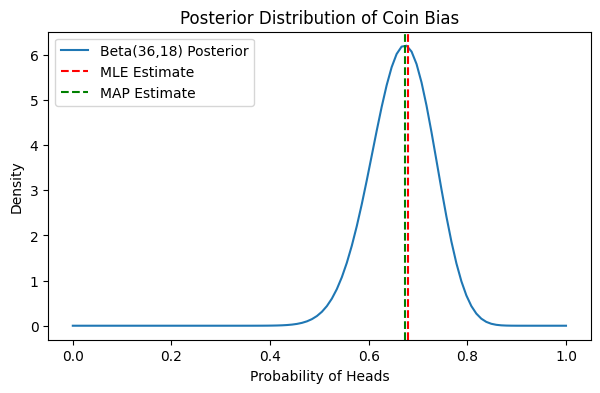

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

class CoinTossEstimator:
    def __init__(self, alpha=1, beta=1):
        self.alpha = alpha  # Beta prior: alpha
        self.beta = beta    # Beta prior: beta

    def mle_estimate(self, flips):
        """Computes MLE estimate for coin bias."""
        return np.mean(flips)  # Sum(y) / n

    def map_estimate(self, flips):
        """Computes MAP estimate using Beta prior."""
        n_heads = np.sum(flips)
        n = len(flips)
        return (n_heads + self.alpha - 1) / (n + self.alpha + self.beta - 2)

    def posterior_distribution(self, flips):
        """Plots posterior Beta distribution after observing data."""
        n_heads = np.sum(flips)
        n = len(flips)
        post_alpha = n_heads + self.alpha
        post_beta = n - n_heads + self.beta

        x = np.linspace(0, 1, 100)
        y = stats.beta.pdf(x, post_alpha, post_beta)

        plt.figure(figsize=(7,4))
        plt.plot(x, y, label=f'Beta({post_alpha},{post_beta}) Posterior')
        plt.axvline(self.mle_estimate(flips), color='red', linestyle='--', label='MLE Estimate')
        plt.axvline(self.map_estimate(flips), color='green', linestyle='--', label='MAP Estimate')
        plt.xlabel('Probability of Heads')
        plt.ylabel('Density')
        plt.title('Posterior Distribution of Coin Bias')
        plt.legend()
        plt.show()

# Simulate coin tosses (1 = heads, 0 = tails)
np.random.seed(42)
flips = np.random.binomial(1, 0.6, 50)  # Simulating 50 flips, true p = 0.6

# Instantiate estimator
coin_estimator = CoinTossEstimator(alpha=2, beta=2)  # Informative prior

# Compute estimates
p_mle = coin_estimator.mle_estimate(flips)
p_map = coin_estimator.map_estimate(flips)

# Print estimates
print(f"MLE Estimate: {p_mle:.3f}")
print(f"MAP Estimate: {p_map:.3f}")

# Plot posterior
coin_estimator.posterior_distribution(flips)


# 🎯 **Understanding the Beta Distribution**
The **Beta distribution** is a continuous probability distribution defined on the interval \([0,1]\), often used to model probabilities and proportions.

## ✅ **Mathematical Definition**
The Beta distribution is parameterized by two positive shape parameters, **α (alpha)** and **β (beta)**:

\[
p(x | \alpha, \beta) = \frac{x^{\alpha-1} (1 - x)^{\beta-1}}{B(\alpha, \beta)}
\]

where \( B(\alpha, \beta) \) is the **Beta function**:

\[
B(\alpha, \beta) = \int_0^1 t^{\alpha - 1} (1 - t)^{\beta - 1} dt
\]

### **🔹 Interpretation of Parameters**
- **α > 1, β > 1** → Bell-shaped distribution, centered around **mean**.
- **α < 1, β < 1** → U-shaped, favoring extreme values (close to 0 or 1).
- **α = β = 1** → Uniform distribution (flat).
- **α > β** → Right-skewed (favoring values near 1).
- **α < β** → Left-skewed (favoring values near 0).

### **📊 Expected Value & Variance**
- **Mean**:  
\[
E[X] = \frac{\alpha}{\alpha + \beta}
\]
- **Variance**:  
\[
Var(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}
\]

### **🔥 Why is Beta Distribution Important?**
- Models probabilities (used in **Bayesian inference**).
- Prior distribution for **Binomial and Bernoulli likelihoods**.
- Flexible and easy to interpret.

---

# 🛠 **Interactive Beta Distribution Simulation**
Below is an interactive visualization using `ipywidgets`, allowing users to adjust **α (alpha)** and **β (beta)** with sliders.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import ipywidgets as widgets
from ipywidgets import interact

def plot_beta(alpha, beta):
    """Function to plot the Beta distribution for given alpha and beta"""
    x = np.linspace(0, 1, 100)
    y = stats.beta.pdf(x, alpha, beta)

    plt.figure(figsize=(7,4))
    plt.plot(x, y, label=f'Beta({alpha}, {beta})', color='blue', linewidth=2)
    plt.fill_between(x, y, alpha=0.3, color='blue')
    plt.axvline(alpha / (alpha + beta), color='red', linestyle='--', label=f'Mean: {alpha / (alpha + beta):.2f}')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.title(f'Beta Distribution (α={alpha}, β={beta})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive sliders
interact(plot_beta, alpha=widgets.FloatSlider(value=2, min=0.5, max=10, step=0.5, description='Alpha'),
                   beta=widgets.FloatSlider(value=2, min=0.5, max=10, step=0.5, description='Beta'));


interactive(children=(FloatSlider(value=2.0, description='Alpha', max=10.0, min=0.5, step=0.5), FloatSlider(va…

# 📚 **MLE & MAP Estimation for a Gaussian (Normal) Distribution**
The **Gaussian (Normal) distribution** is widely used in statistics and machine learning. Given a dataset \( X = \{x_1, x_2, ..., x_n\} \), we want to estimate the **mean (\(\mu\))** and **variance (\(\sigma^2\))**.

## ✅ **1. Maximum Likelihood Estimation (MLE)**
MLE finds parameters that **maximize the likelihood** of the observed data.

### **Likelihood Function**
The probability density function (PDF) of a normal distribution:

\[
p(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
\]

For **n** i.i.d. samples, the **likelihood function** is:

\[
L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
\]

### **Log-Likelihood Function**
Taking the log:

\[
\ell(\mu, \sigma^2) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
\]

### **Solving for MLE Estimates**
To maximize, take derivatives and set to zero:

\[
\frac{d\ell}{d\mu} = \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu) = 0 \quad \Rightarrow \quad \hat{\mu}_{MLE} = \frac{1}{n} \sum_{i=1}^{n} x_i
\]

\[
\frac{d\ell}{d\sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{n} (x_i - \mu)^2 = 0 \quad \Rightarrow \quad \hat{\sigma}^2_{MLE} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{\mu})^2
\]

Thus, **MLE estimates**:
\[
\hat{\mu}_{MLE} = \frac{1}{n} \sum x_i, \quad \hat{\sigma}^2_{MLE} = \frac{1}{n} \sum (x_i - \hat{\mu})^2
\]

---

## ✅ **2. Maximum A Posteriori (MAP) Estimation**
MAP incorporates **prior knowledge** (Bayesian approach).

### **Gaussian Prior on \(\mu\)**
We assume a prior:

\[
p(\mu) \sim \mathcal{N}(\mu_0, \tau^2)
\]

### **Posterior Distribution**
Using **Bayes' Theorem**:

\[
p(\mu | X) \propto p(X | \mu) p(\mu)
\]

Multiplying likelihood and prior:

\[
\log p(\mu | X) = \sum_{i=1}^{n} -\frac{(x_i - \mu)^2}{2\sigma^2} - \frac{(\mu - \mu_0)^2}{2\tau^2}
\]

Taking derivative and solving:

\[
\hat{\mu}_{MAP} = \frac{n\hat{\mu}_{MLE} / \sigma^2 + \mu_0 / \tau^2}{n / \sigma^2 + 1 / \tau^2}
\]

\[
\hat{\sigma}^2_{MAP} = \frac{1}{n} \sum (x_i - \hat{\mu}_{MAP})^2
\]

### **Intuition:**
- **MLE** is just the sample mean.
- **MAP** is a **weighted average** of the MLE and prior mean \( \mu_0 \).
- When **prior variance \( \tau^2 \) is large**, MAP ≈ MLE.

---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import ipywidgets as widgets
from ipywidgets import interact

class GaussianEstimator:
    def __init__(self, mu0=0, tau2=1):  # Prior parameters
        self.mu0 = mu0
        self.tau2 = tau2

    def mle_estimate(self, data):
        """Computes MLE estimates for mean and variance."""
        mu_mle = np.mean(data)
        sigma2_mle = np.var(data, ddof=0)  # MLE variance (ddof=0)
        return mu_mle, sigma2_mle

    def map_estimate(self, data, sigma2):
        """Computes MAP estimates for mean, assuming Gaussian prior on μ."""
        n = len(data)
        mu_mle = np.mean(data)
        mu_map = (n * mu_mle / sigma2 + self.mu0 / self.tau2) / (n / sigma2 + 1 / self.tau2)
        sigma2_map = np.var(data, ddof=0)  # Keep variance the same
        return mu_map, sigma2_map

    def plot_estimates(self, data):
        """Plots Normal distribution with MLE and MAP estimates."""
        mu_mle, sigma2_mle = self.mle_estimate(data)
        mu_map, sigma2_map = self.map_estimate(data, sigma2_mle)

        x = np.linspace(mu_mle - 3*np.sqrt(sigma2_mle), mu_mle + 3*np.sqrt(sigma2_mle), 100)
        y_mle = stats.norm.pdf(x, mu_mle, np.sqrt(sigma2_mle))
        y_map = stats.norm.pdf(x, mu_map, np.sqrt(sigma2_map))

        plt.figure(figsize=(7,4))
        plt.plot(x, y_mle, label=f'MLE: μ={mu_mle:.2f}, σ²={sigma2_mle:.2f}', color='blue', linewidth=2)
        plt.plot(x, y_map, label=f'MAP: μ={mu_map:.2f}, σ²={sigma2_map:.2f}', color='green', linestyle='dashed', linewidth=2)
        plt.axvline(mu_mle, color='blue', linestyle='--', alpha=0.7)
        plt.axvline(mu_map, color='green', linestyle='--', alpha=0.7)
        plt.xlabel('x')
        plt.ylabel('Density')
        plt.title('MLE vs MAP Gaussian Estimation')
        plt.legend()
        plt.grid(True)
        plt.show()

# Generate Gaussian Data
np.random.seed(42)
true_mu, true_sigma = 5, 2
data = np.random.normal(true_mu, true_sigma, size=50)

# Interactive widget to adjust prior mean & variance
def interactive_demo(mu0, tau2):
    estimator = GaussianEstimator(mu0=mu0, tau2=tau2)
    estimator.plot_estimates(data)

interact(interactive_demo,
         mu0=widgets.FloatSlider(value=5, min=0, max=10, step=0.1, description='Prior μ'),
         tau2=widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='Prior τ²'));


interactive(children=(FloatSlider(value=5.0, description='Prior μ', max=10.0), FloatSlider(value=1.0, descript…

xx# 📚 **MLE & MAP for Linear Regression + Ridge & Lasso Explanation**

## ✅ **1. Introduction: Linear Regression**
Linear regression models the relationship between an independent variable \(X\) and a dependent variable \(y\) using:

\[
y = X\beta + \epsilon
\]

where:
- \( X \) is the feature matrix (including an intercept column).
- \( \beta \) is the coefficient vector.
- \( \epsilon \sim \mathcal{N}(0, \sigma^2 I) \) is Gaussian noise.

---

## ✅ **2. Maximum Likelihood Estimation (MLE)**
### **Likelihood Function**
Assuming errors are normally distributed, the likelihood function is:

\[
p(y | X, \beta, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - X_i\beta)^2}{2\sigma^2}\right)
\]

Taking the **log-likelihood**:

\[
\ell(\beta) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} (y - X\beta)^T (y - X\beta)
\]

### **Solving for MLE**
To maximize:

\[
\frac{\partial \ell}{\partial \beta} = \frac{1}{\sigma^2} X^T (y - X\beta) = 0
\]

Solving:

\[
\hat{\beta}_{MLE} = (X^T X)^{-1} X^T y
\]

This is the **Ordinary Least Squares (OLS) solution**.

---

## ✅ **3. Maximum A Posteriori (MAP) Estimation**
MAP incorporates **prior knowledge** about \( \beta \) using a **Gaussian prior**:

\[
p(\beta) \sim \mathcal{N}(0, \lambda I)
\]

Using **Bayes' theorem**:

\[
p(\beta | y, X) \propto p(y | X, \beta) p(\beta)
\]

Taking the log:

\[
\log p(\beta | y, X) = -\frac{1}{2\sigma^2} (y - X\beta)^T (y - X\beta) - \frac{\lambda}{2} \beta^T \beta
\]

Taking derivative:

\[
X^T (y - X\beta) - \lambda \beta = 0
\]

Solving for \( \beta \):

\[
\hat{\beta}_{MAP} = (X^T X + \lambda I)^{-1} X^T y
\]

This introduces **regularization**, preventing overfitting.

---

## ✅ **4. Ridge & Lasso Regression**
### **4.1 Ridge Regression (L2 Regularization)**
- **Equivalent to MAP** with **Gaussian prior**.
- Penalizes large coefficients by adding a term:

\[
\hat{\beta}_{ridge} = (X^T X + \lambda I)^{-1} X^T y
\]

- Helps in cases of **multicollinearity**.
- Prevents overfitting by **shrinking coefficients**.

### **4.2 Lasso Regression (L1 Regularization)**
- Uses **Laplace prior** on \( \beta \).
- Minimizes:

\[
\sum_{i=1}^{n} (y_i - X_i\beta)^2 + \lambda \sum_{j} |\beta_j|
\]

- **Feature selection**: Some coefficients are set to **zero**.
- Useful for **sparse models**.

---

## ✅ **5. Summary**
| Method  | Equation | Use Case |
|---------|----------|---------|
| **MLE (OLS)** | \( \hat{\beta} = (X^T X)^{-1} X^T y \) | No regularization, overfits with small data |
| **MAP (Ridge)** | \( \hat{\beta} = (X^T X + \lambda I)^{-1} X^T y \) | Prevents overfitting, stabilizes coefficients |
| **Lasso** | \( \sum (y_i - X_i\beta)^2 + \lambda \sum |\beta_j| \) | Feature selection, sparse models |



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

class LinearRegression:
    def __init__(self, reg_type=None, lambda_reg=0.0):
        self.reg_type = reg_type  # None, 'ridge', 'lasso'
        self.lambda_reg = lambda_reg

    def fit(self, X, y):
        """Fit MLE, Ridge, or Lasso depending on reg_type."""
        n, d = X.shape
        if self.reg_type == "ridge":
            reg_matrix = self.lambda_reg * np.eye(d)
            self.beta = np.linalg.inv(X.T @ X + reg_matrix) @ X.T @ y
        elif self.reg_type == "lasso":
            from sklearn.linear_model import Lasso
            self.beta = Lasso(alpha=self.lambda_reg, fit_intercept=False).fit(X, y).coef_
        else:
            self.beta = np.linalg.inv(X.T @ X) @ X.T @ y  # MLE

    def predict(self, X):
        return X @ self.beta

# Load dataset
X, y = sklearn.datasets.load_diabetes(return_X_y=True)
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept

# Fit models
model_mle = LinearRegression().fit(X, y)
model_ridge = LinearRegression(reg_type="ridge", lambda_reg=1.0).fit(X, y)
model_lasso = LinearRegression(reg_type="lasso", lambda_reg=0.1).fit(X, y)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

# Simulate data
np.random.seed(42)
X = np.linspace(-3, 3, 50).reshape(-1, 1)
y = 3 * X.squeeze() ** 2 + np.random.normal(0, 2, X.shape[0])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def plot_regression(degree=2, reg_type=None, lambda_reg=0.0):
    """Fit & plot polynomial regression with optional Ridge/Lasso."""
    model = make_pipeline(
        PolynomialFeatures(degree),
        Ridge(alpha=lambda_reg) if reg_type == "ridge" else Lasso(alpha=lambda_reg) if reg_type == "lasso" else LinearRegression()
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.scatter(X_train, y_train, color="blue", label="Train data")
    plt.scatter(X_test, y_test, color="red", label="Test data")

    X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_range_pred = model.predict(X_range)

    plt.plot(X_range, y_range_pred, label=f"Degree {degree} - {reg_type if reg_type else 'OLS'}", linewidth=2)
    plt.legend()
    plt.title(f"Polynomial Regression (Degree {degree}, {reg_type if reg_type else 'OLS'})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

# Interactive plot
import ipywidgets as widgets
from ipywidgets import interact

interact(plot_regression,
         degree=widgets.IntSlider(value=2, min=1, max=10, step=1, description='Degree'),
         reg_type=widgets.Dropdown(options=[None, "ridge", "lasso"], description="Regularization"),
         lambda_reg=widgets.FloatSlider(value=0.1, min=0.0, max=10, step=0.1, description='Lambda'));


interactive(children=(IntSlider(value=2, description='Degree', max=10, min=1), Dropdown(description='Regulariz…

In [ ]:
import numpy as np
import pandas as pd

class LinearRegressionScratch:
    def __init__(self, reg_type=None, lambda_reg=0.0, lr=0.01, num_iters=1000):
        """
        Linear Regression from scratch with options for MLE, Ridge (L2), and Lasso (L1)
        reg_type: None (OLS), 'ridge', or 'lasso'
        lambda_reg: Regularization parameter for Ridge and Lasso
        lr: Learning rate for Lasso (sub-gradient descent)
        num_iters: Iterations for Lasso optimization
        """
        self.reg_type = reg_type
        self.lambda_reg = lambda_reg
        self.lr = lr
        self.num_iters = num_iters

    def fit(self, X, y):
        """Fit the linear regression model using closed-form solution (MLE, Ridge) or iterative (Lasso)."""
        X = np.c_[np.ones(X.shape[0]), X]  # Add intercept
        self.n_features = X.shape[1]

        if self.reg_type == "ridge":
            reg_matrix = self.lambda_reg * np.eye(self.n_features)
            reg_matrix[0, 0] = 0  # Don't regularize intercept
            self.beta = np.linalg.inv(X.T @ X + reg_matrix) @ X.T @ y

        elif self.reg_type == "lasso":
            self.beta = np.zeros(self.n_features)
            for _ in range(self.num_iters):
                y_pred = X @ self.beta
                gradient = -2 * X.T @ (y - y_pred) / len(y)
                self.beta -= self.lr * gradient
                self.beta[1:] -= self.lr * self.lambda_reg * np.sign(self.beta[1:])  # L1 penalty

        else:  # MLE (OLS)
            self.beta = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        """Make predictions using the trained model."""
        X = np.c_[np.ones(X.shape[0]), X]  # Add intercept
        return X @ self.beta

# Load dataset (Boston Housing)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Convert to NumPy
X, y = X.values, y

# Train models
mle_model = LinearRegressionScratch()
mle_model.fit(X, y)

ridge_model = LinearRegressionScratch(reg_type="ridge", lambda_reg=1.0)
ridge_model.fit(X, y)

lasso_model = LinearRegressionScratch(reg_type="lasso", lambda_reg=0.1, lr=0.01, num_iters=1000)
lasso_model.fit(X, y)


<ipython-input-19-1920457e4353>:32: RuntimeWarning: overflow encountered in matmul
  gradient = -2 * X.T @ (y - y_pred) / len(y)
<ipython-input-19-1920457e4353>:33: RuntimeWarning: invalid value encountered in subtract
  self.beta -= self.lr * gradient


# 📚 **Logistic & Linear Regression from Scratch + Interactive Visualization**

## ✅ **1. Linear Regression**
Linear regression models a **continuous** relationship between input \(X\) and output \(y\):

\[
y = X\beta + \epsilon
\]

where:
- \(X\) is the feature matrix.
- \(\beta\) is the coefficient vector.
- \(\epsilon\) is Gaussian noise.

### **Solution (MLE - Ordinary Least Squares)**
To minimize **Mean Squared Error (MSE)**:

\[
\hat{\beta} = (X^T X)^{-1} X^T y
\]

---

## ✅ **2. Logistic Regression**
Logistic regression models a **binary classification** problem:

\[
p(y=1 | X) = \frac{1}{1 + e^{-X\beta}}
\]

To find \( \beta \), we **maximize the likelihood**:

\[
L(\beta) = \prod_{i=1}^{n} p_i^{y_i} (1 - p_i)^{1 - y_i}
\]

Taking the **log-likelihood**:

\[
\ell(\beta) = \sum_{i=1}^{n} y_i \log(p_i) + (1 - y_i) \log(1 - p_i)
\]

Since there's no closed-form solution, we use **Gradient Descent**:

\[
\beta = \beta - \alpha \cdot \nabla \ell(\beta)
\]

where:

\[
\nabla \ell(\beta) = X^T (y - p)
\]

---

# 📌 **3. Interactive Visualization of Linear Regression**
The interactive plot below helps understand **how regression lines fit data** by adjusting parameters.


In [ ]:
import numpy as np
import pandas as pd

class LinearRegressionScratch:
    def __init__(self):
        self.beta = None

    def fit(self, X, y):
        """Fit the model using Normal Equation (MLE)."""
        X = np.c_[np.ones(X.shape[0]), X]  # Add intercept
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        """Predict using the trained model."""
        X = np.c_[np.ones(X.shape[0]), X]  # Add intercept
        return X @ self.beta

class LogisticRegressionScratch:
    def __init__(self, lr=0.01, num_iters=1000):
        self.lr = lr
        self.num_iters = num_iters
        self.beta = None

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Fit model using Gradient Descent."""
        X = np.c_[np.ones(X.shape[0]), X]  # Add intercept
        self.beta = np.zeros(X.shape[1])

        for _ in range(self.num_iters):
            predictions = self.sigmoid(X @ self.beta)
            gradient = X.T @ (y - predictions)
            self.beta += self.lr * gradient

    def predict(self, X):
        """Predict probabilities and classes."""
        X = np.c_[np.ones(X.shape[0]), X]  # Add intercept
        probabilities = self.sigmoid(X @ self.beta)
        return (probabilities >= 0.5).astype(int)

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Features
y_linear = 3 * X.squeeze() + 5 + np.random.randn(100) * 2  # Linear regression target
y_logistic = (X.squeeze() > 5).astype(int)  # Binary classification (above 5)

# Train models
lin_reg = LinearRegressionScratch()
lin_reg.fit(X, y_linear)

log_reg = LogisticRegressionScratch(lr=0.01, num_iters=10000)
log_reg.fit(X, y_logistic)


In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_linear_regression(slope=3, intercept=5, noise=2):
    """Interactive visualization of Linear Regression."""
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10
    y = slope * X.squeeze() + intercept + np.random.randn(100) * noise

    # Fit Linear Regression from Scratch
    lin_reg = LinearRegressionScratch()
    lin_reg.fit(X, y)
    y_pred = lin_reg.predict(X)

    plt.scatter(X, y, color="blue", label="True Data")
    plt.plot(X, y_pred, color="red", linewidth=2, label="Fitted Line")
    plt.xlabel("Feature X")
    plt.ylabel("Target y")
    plt.title(f"Linear Regression (Slope: {slope}, Intercept: {intercept})")
    plt.legend()
    plt.grid(True)
    plt.show()

interact(plot_linear_regression,
         slope=widgets.FloatSlider(value=3, min=0, max=10, step=0.1, description='Slope'),
         intercept=widgets.FloatSlider(value=5, min=-10, max=10, step=0.5, description='Intercept'),
         noise=widgets.FloatSlider(value=2, min=0, max=5, step=0.1, description='Noise'));


interactive(children=(FloatSlider(value=3.0, description='Slope', max=10.0), FloatSlider(value=5.0, descriptio…

# 📚 **Linear Regression as Projection in Vector Spaces**

## ✅ **1. Linear Regression and Vector Spaces**
Linear regression finds a **linear relationship** between the dependent variable \( y \) and the independent variables \( X \):

\[
y = X\beta + \epsilon
\]

where:
- \( X \) is the **feature matrix** (including an intercept column).
- \( \beta \) is the **coefficient vector**.
- \( \epsilon \) is the **error term (residuals)**.

### **Understanding Subspaces in Linear Algebra**
A matrix \( X \) defines four fundamental subspaces:
1. **Column Space (\(\text{Col}(X)\))**: The space spanned by the columns of \( X \).
2. **Row Space (\(\text{Row}(X)\))**: The space spanned by the rows of \( X \).
3. **Null Space (\(\text{Null}(X)\))**: The space of vectors mapped to zero by \( X \).
4. **Left Null Space (\(\text{Null}(X^T)\))**: The space of residuals (differences between actual and predicted values).

---

## ✅ **2. Least Squares Solution as Projection**
The goal of **Ordinary Least Squares (OLS)** is to find the **best projection


# 📚 **Linear Regression as Projection in Vector Spaces**

## ✅ **1. Linear Regression and Vector Spaces**
Linear regression finds a **linear relationship** between the dependent variable \( y \) and the independent variables \( X \):

\[
y = X\beta + \epsilon
\]

where:
- \( X \) is the **feature matrix** (including an intercept column).
- \( \beta \) is the **coefficient vector**.
- \( \epsilon \) is the **error term (residuals)**.

### **Understanding Subspaces in Linear Algebra**
A matrix \( X \) defines four fundamental subspaces:
1. **Column Space (\(\text{Col}(X)\))**: The space spanned by the columns of \( X \).
2. **Row Space (\(\text{Row}(X)\))**: The space spanned by the rows of \( X \).
3. **Null Space (\(\text{Null}(X)\))**: The space of vectors mapped to zero by \( X \).
4. **Left Null Space (\(\text{Null}(X^T)\))**: The space of residuals (differences between actual and predicted values).

---

## ✅ **2. Least Squares Solution as Projection**
The goal of **Ordinary Least Squares (OLS)** is to find the **best projection** of \( y \) onto the column space of \( X \), minimizing the residuals.

### **Projection Interpretation**
- The observed target \( y \) **may not lie** perfectly in the column space of \( X \).
- We **project** \( y \) onto \( \text{Col}(X) \) to find \( \hat{y} \) (the best approximation of \( y \)).
- The residual vector \( r \) (error) is **orthogonal** to the column space of \( X \):

\[
y = X\beta + r, \quad \text{where } r \perp \text{Col}(X)
\]

### **Mathematical Solution (Normal Equations)**
To ensure \( r \) is **orthogonal**, we impose:

\[
X^T r = 0
\]

Since \( r = y - X\hat{\beta} \), we get:

\[
X^T(y - X\hat{\beta}) = 0
\]

\[
X^T y = X^T X \hat{\beta}
\]

Solving for \( \beta \):

\[
\hat{\beta} = (X^T X)^{-1} X^T y
\]

This is the **Least Squares Solution**—the projection of \( y \) onto the column space of \( X \).

---

## ✅ **3. Geometric Interpretation**
- **\( y \)** is an **n-dimensional vector**.
- The model \( X\beta \) represents a **subspace** of lower dimension.
- The OLS estimator **projects \( y \) into this subspace**, minimizing the perpendicular distance.
- The residual \( r = y - X\hat{\beta} \) is **perpendicular** to \( X \)'s column space.

### **Orthogonality Condition:**
\[
X^T r = 0
\]

which ensures that the solution is optimal in the **least-squares sense**.

---

## ✅ **4. Summary**
| Concept | Explanation |
|---------|------------|
| **Column Space (\(\text{Col}(X)\))** | Space spanned by feature matrix \( X \) |
| **Projection** | Best approximation of \( y \) in \( \text{Col}(X) \) |
| **Residuals \( r \)** | Orthogonal to \( \text{Col}(X) \), meaning \( X^T r = 0 \) |
| **Least Squares Solution** | \( \hat{\beta} = (X^T X)^{-1} X^T y \) |
| **Geometric View** | \( \hat{y} \) is the projection of \( y \) onto \( X\)'s subspace |

---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

class LinearRegressionProjection:
    def __init__(self):
        self.beta = None

    def fit(self, X, y):
        """Computes OLS solution using Normal Equation."""
        X = np.c_[np.ones(X.shape[0]), X]  # Add intercept
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        """Predicts using the learned model."""
        X = np.c_[np.ones(X.shape[0]), X]  # Add intercept
        return X @ self.beta

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(20, 1) * 10  # 1D Feature
y = 3 * X.squeeze() + 5 + np.random.randn(20) * 2  # True Relationship + Noise

# Fit Linear Regression
model = LinearRegressionProjection()
model.fit(X, y)
y_pred = model.predict(X)

# Function to visualize projection
def plot_projection(show_residuals=True):
    """Visualizes how OLS projects y onto the column space of X."""
    plt.figure(figsize=(7,5))

    # Scatter plot of actual points
    plt.scatter(X, y, color="blue", label="Observed Data")

    # Regression line
    X_sorted = np.sort(X, axis=0)
    y_pred_sorted = model.predict(X_sorted)
    plt.plot(X_sorted, y_pred_sorted, color="red", linewidth=2, label="Projection (Best Fit Line)")

    # Residuals (Projection Distance)
    if show_residuals:
        for i in range(len(X)):
            plt.plot([X[i], X[i]], [y[i], y_pred[i]], color="gray", linestyle="dotted", alpha=0.6)

    plt.xlabel("Feature X")
    plt.ylabel("Target y")
    plt.title("Linear Regression as Projection in Vector Space")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive plot to toggle residuals
interact(plot_projection, show_residuals=widgets.Checkbox(value=True, description="Show Residuals"));


interactive(children=(Checkbox(value=True, description='Show Residuals'), Output()), _dom_classes=('widget-int…